# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import KElbowVisualizer

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
X = wine.data
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [12]:
kmeans_8 = KMeans(n_clusters=8, random_state=10)

In [63]:
cluster_labels = kmeans_8.fit_predict(X)

In [14]:
silhouette_k8 = silhouette_score(X, cluster_kmeans_8)

In [17]:
print(f'Silhouette Score for k=8 is {silhouette_k8}')

Silhouette Score for k=8 is 0.5398971441034137


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [18]:
kmeans_5 = KMeans(n_clusters=5, random_state=10)

In [19]:
cluster_kmeans_5 = kmeans_5.fit_predict(X)

In [20]:
silhouette_k5 = silhouette_score(X, cluster_kmeans_5)

In [21]:
print(f'Silhouette Score for k=5 is {silhouette_k5}')

Silhouette Score for k=5 is 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [22]:
kmeans_3 = KMeans(n_clusters=3, random_state=10)

In [23]:
cluster_kmeans_3 = kmeans_3.fit_predict(X)

In [24]:
silhouette_k3 = silhouette_score(X, cluster_kmeans_3)

In [25]:
print(f'Silhouette Score for k=3 is {silhouette_k3}')

Silhouette Score for k=3 is 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

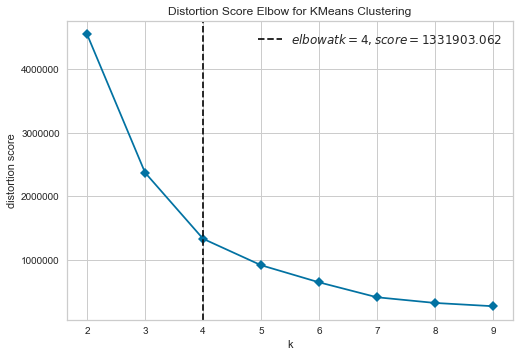

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False) #the default value is distorsion

visualizer.fit(X)
visualizer.show()
plt.show()      

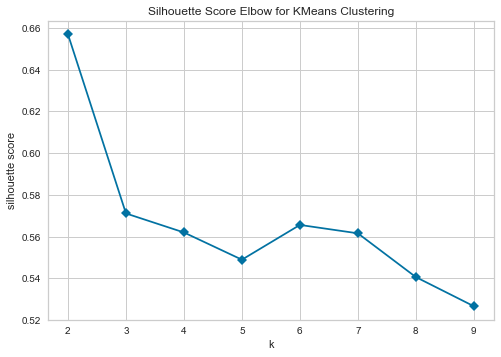

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False, locate_elbow=False) 
#the YellowbrickWarnin is not detecting an elbow, I pass locate_elbow=False to avoid the warnings

visualizer.fit(X) 
visualizer.show()
plt.show()     

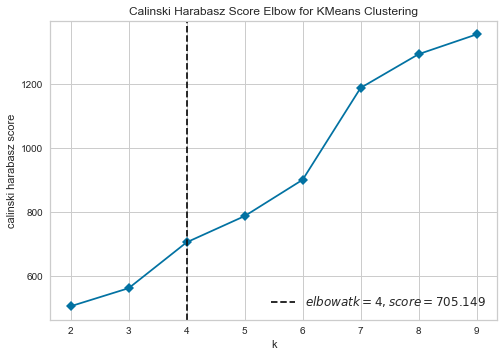

In [46]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)       
visualizer.show()          
plt.show()          

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

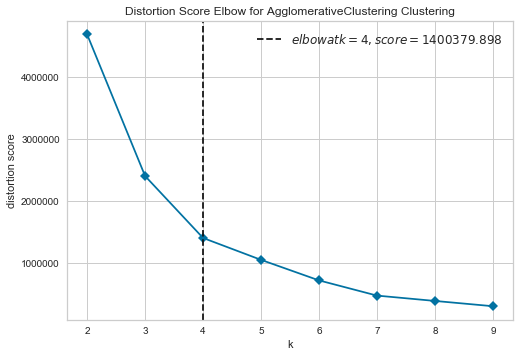

In [49]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False) #the default value is distorsion

visualizer.fit(X)
visualizer.show()
plt.show() 

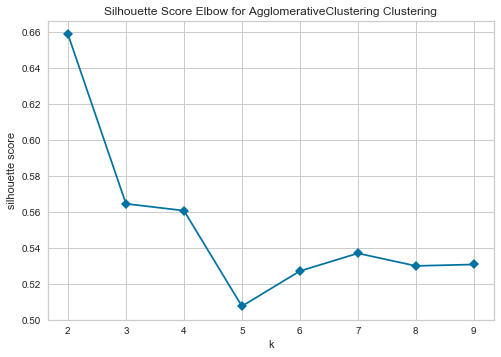

In [53]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False, locate_elbow=False) 
#the YellowbrickWarnin is not detecting an elbow again, I pass locate_elbow=False to avoid the warnings

visualizer.fit(X) 
visualizer.show()
plt.show()   

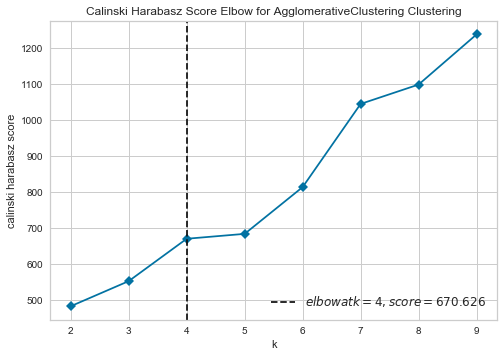

In [51]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)       
visualizer.show()          
plt.show()     

<font color='blue'>Results are pretty the same, excep for the silhouette that seams not to work fine with this dataset
</font>

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [74]:
X = pd.DataFrame(data= np.c_[wine.data],
                     columns= wine.feature_names)

In [75]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [76]:
kmeans_4 = KMeans(n_clusters=4, random_state=10)

In [77]:
cluster_kmeans_4 = kmeans_4.fit(X)

In [78]:
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = cluster_kmeans_4.labels_

In [79]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,3
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


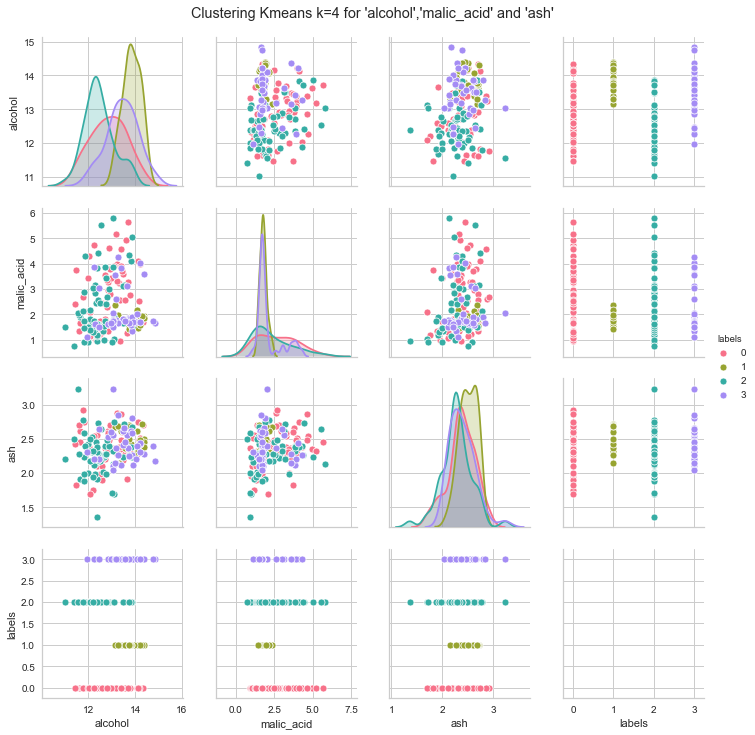

In [113]:
#Primer bin
g = sns.pairplot(X.iloc[:,np.r_[:3,13]], hue='labels', palette="husl")
g.fig.suptitle("Clustering Kmeans k=4 for 'alcohol','malic_acid' and 'ash'", y=1.02)
plt.show()

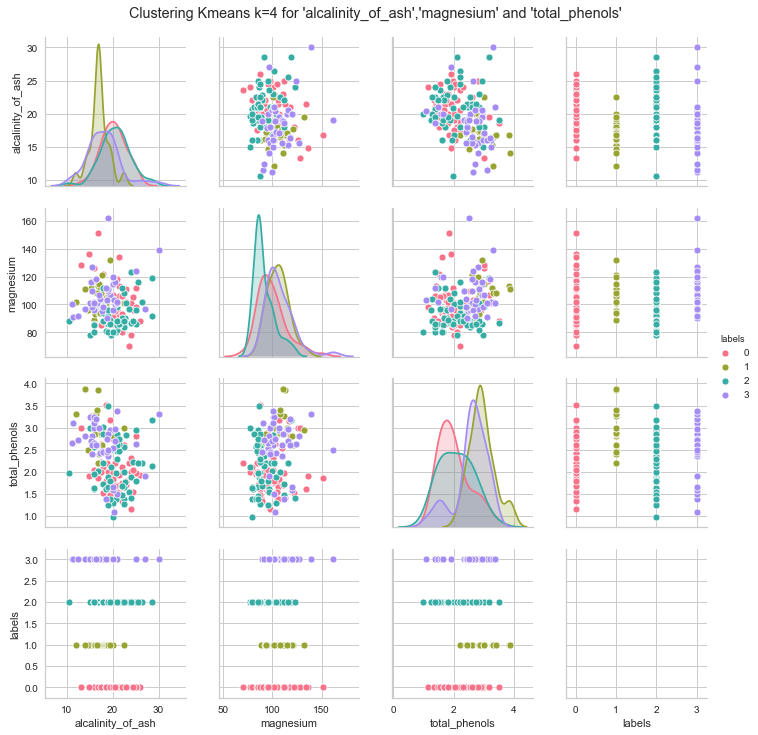

In [114]:
#Segundo bin
g = sns.pairplot(X.iloc[:,np.r_[3:6,13]], hue='labels', palette="husl")
g.fig.suptitle("Clustering Kmeans k=4 for 'alcalinity_of_ash','magnesium' and 'total_phenols'", y=1.02)
plt.show()

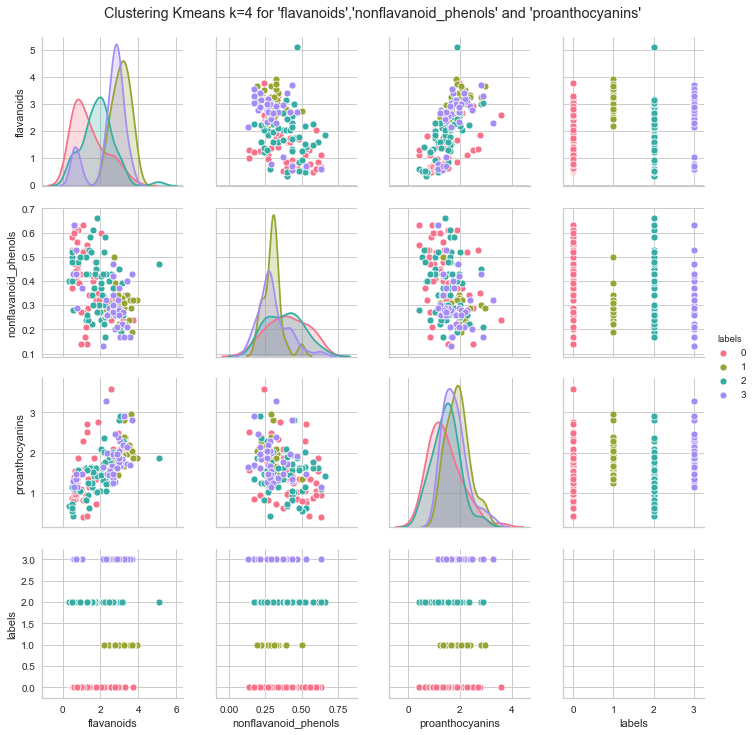

In [115]:
#Tercer bin
g = sns.pairplot(X.iloc[:,np.r_[6:9,13]], hue='labels', palette="husl")
g.fig.suptitle("Clustering Kmeans k=4 for 'flavanoids','nonflavanoid_phenols' and 'proanthocyanins'", y=1.02)
plt.show()

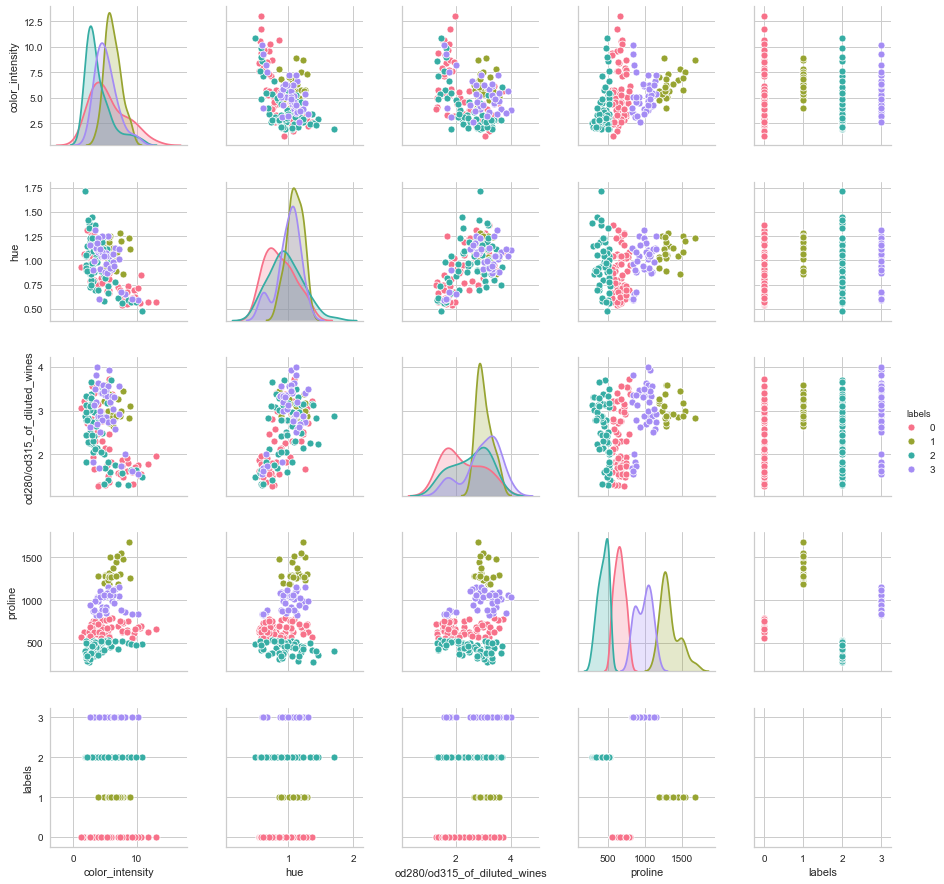

In [116]:
#Cuarto bin
sns.pairplot(X.iloc[:,9:], hue='labels', palette="husl")
g.fig.suptitle("Clustering Kmeans k=4 for 'color_intensity','hue','od280/od315_of_diluted_wines' and 'proline'", y=1.02)
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.